# Scaling and Transformations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-20,19.790001,20.08,19.350000,19.980000,19.980000,62983200
2018-08-21,19.980000,20.42,19.860001,20.400000,20.400000,55629000
2018-08-22,20.280001,20.92,20.209999,20.900000,20.900000,62002700
2018-08-23,21.190001,22.32,21.139999,22.290001,22.290001,113444100
2018-08-24,22.910000,24.00,22.670000,23.980000,23.980000,164328200


# Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(dataset[['Volume']])

# Transform the data using the fitted scaler
dataset['Volume_MM'] = MM_scaler.transform(dataset[['Volume']])

In [6]:
print(dataset[['Volume_MM', 'Volume']].head())

            Volume_MM    Volume
Date                           
2014-01-02   0.076577  20548400
2014-01-03   0.085293  22887200
2014-01-06   0.158004  42398300
2014-01-07   0.159994  42932100
2014-01-08   0.114329  30678700


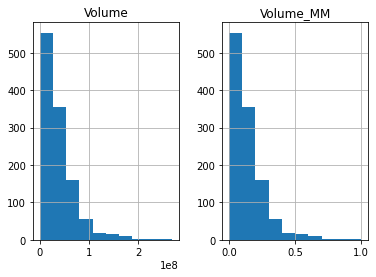

In [7]:
dataset[['Volume_MM', 'Volume']].hist()
plt.show()

# Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(dataset[['Volume']])

# Transform the data using the fitted scaler
dataset['Volume_SS'] = SS_scaler.transform(dataset[['Volume']])


In [10]:
print(dataset[['Volume_SS', 'Volume']].head())

            Volume_SS    Volume
Date                           
2014-01-02  -0.509131  20548400
2014-01-03  -0.439377  22887200
2014-01-06   0.142538  42398300
2014-01-07   0.158459  42932100
2014-01-08  -0.206997  30678700


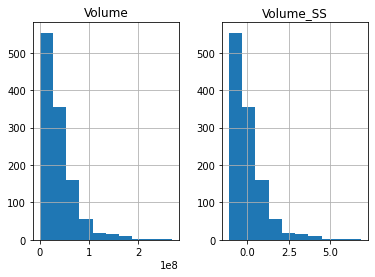

In [11]:
dataset[['Volume_SS', 'Volume']].hist()
plt.show()

# Log Transformation

In [12]:
from sklearn.preprocessing import PowerTransformer

In [13]:
# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(dataset[['Volume']])

# Apply the power transform to the data
dataset['Volume_LG'] = pow_trans.transform(dataset[['Volume']])

In [14]:
print(dataset[['Volume_LG', 'Volume']].head())

            Volume_LG    Volume
Date                           
2014-01-02  -0.356839  20548400
2014-01-03  -0.238326  22887200
2014-01-06   0.485856  42398300
2014-01-07   0.501407  42932100
2014-01-08   0.095745  30678700


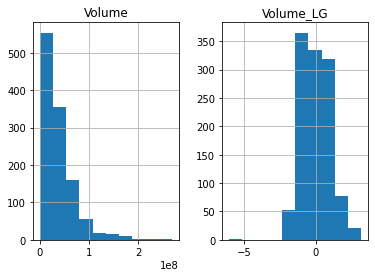

In [15]:
dataset[['Volume', 'Volume_LG']].hist()
plt.show()